In [1]:
import pandas as pd
# 数据分析,使用pandas导入csv再使用seaborn绘图
import matplotlib.pyplot as plt
# 2D绘图
import seaborn as sns
# 基于matplotlib进行高级封装的可视化库
print("----------")

----------


In [2]:
original_data = pd.read_csv("Penguins.csv")
# 通过Pandas的read_csv函数，
# 将原始数据文件Penguins.csv里的数据内容，
# 解析为DataFrame(表格)并赋值给变量original_data
original_data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
cleaned_data = original_data.copy()# 建立副本
cleaned_data.head(10)# 查看头10个数据

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
cleaned_data.info()# 用info方法看看数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


 从输出结果来看，`cleaned_data`数据共有344条观察值，
 `culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`这四个变量存在缺失值，少了两个
 将在后续进行评估和清理。

In [5]:
# 我们已知`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")
# 换成category类型

In [6]:
cleaned_data.info()# 看看
# float64改成了category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


In [7]:
# 先提取出缺失这些变量的观察值进行查看
# 从cleaned_data DataFrame中选择那些"-----"列中有缺失值的行
cleaned_data.query("culmen_length_mm.isna()")
# isna(): pandas Series的方法，用于检查Series中的每个元素是否为缺失值（即NaN）

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
cleaned_data.query("culmen_depth_mm.isna()")
# 索引为3和339的观察值，除了种类和所属岛屿外所有变量都为空(NaN)，把这两行直接删除
# 用drop()方法


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
cleaned_data.drop(3, inplace=True)# 参数:要删除的索引, 确定直接在原始DataFrame上进行更改
cleaned_data.drop(339, inplace=True)

In [10]:
cleaned_data.query("sex.isna()")
# 判断 sex 列中的每个元素是否为缺失值。isna() 是 pandas Series 的一个方法，用于生成一个布尔序列，其中的每个元素表示原始序列中相应位置的元素是否为 NaN

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [11]:
cleaned_data["species"].value_counts()
# 不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [12]:
cleaned_data["island"].value_counts()
# 发现不存在不一致的数据

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [13]:
cleaned_data["sex"].value_counts()
# 发现sex中有一个句号值,当成空值NaN

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [14]:
import numpy as np# 库
cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)
# 将sex中所有.替换成NaN
# np.nan是NumPy库中的一个特殊浮点值，用于表示缺失或不可表示的数据

C:\Users\HP\AppData\Local\Temp\ipykernel_3168\2771257622.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)


In [15]:
cleaned_data["sex"].value_counts()
# 再次查看sex列的数据情况, 看看替换了句号吗

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [16]:
cleaned_data.describe()
# 计算统计量=====
# count：非空值的数量
# mean：平均值
# std：标准差
# min：最小值
# 25%：第 25 百分位数（下四分位数）
# 50%：第 50 百分位数（中位数）
# 75%：第 75 百分位数（上四分位数）
# max：最大值

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [17]:
print("数据处理完毕 , 可视化开始")

数据处理完毕 , 可视化开始


In [18]:
# 设置图表色盘: https://blog.csdn.net/bayern_xie/article/details/119715569

# (sns.set_palette("pastel") )
# (sns.set_palette("pastel") )
(sns.set_palette("bright") )
# 选彩色:搜seaborn palette

In [19]:
cleaned_data
# 输出索引,列名,数据

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


饼图看比例
先获得汇总数据

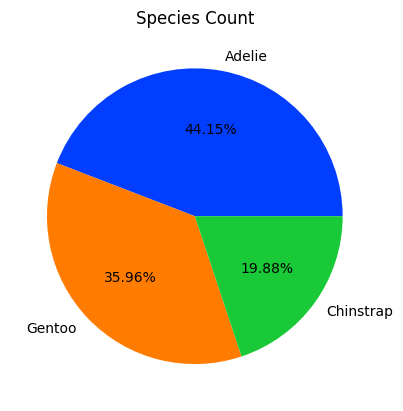

In [20]:
species_count = cleaned_data["species"].value_counts() 
# 统计各个种类的个数,并赋值
# 画饼图(bornbean没有这个方法, 用matplotlib调用)
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count, autopct='%.2f%%', labels=species_count.index)# 参数: autopct是添加的数字, labels是标签名称赋为索引即可
plt.title('Species Count')# 添加标题
plt.show()

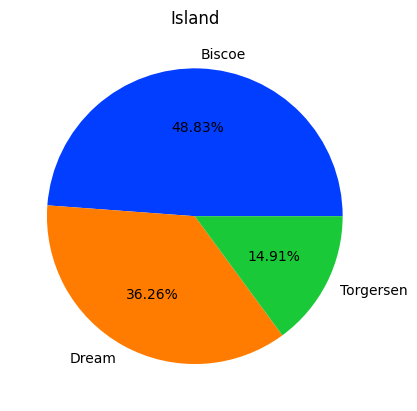

In [21]:
# 在看看island
species_count = cleaned_data["island"].value_counts()
plt.pie(species_count, autopct='%.2f%%', labels=species_count.index)# 参数: autopct是添加的数字, labels是标签名称赋为索引即可
plt.title('Island')# 添加标题
plt.show()

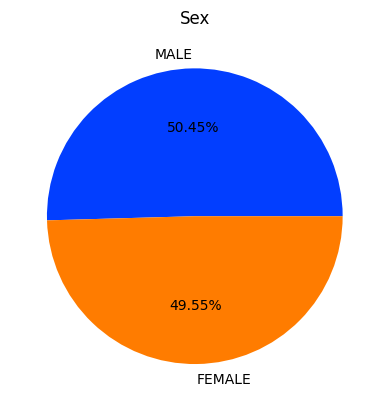

In [22]:
# 还有性别
species_count = cleaned_data["sex"].value_counts()
plt.pie(species_count, autopct='%.2f%%', labels=species_count.index)# 参数: autopct是添加的数字, labels是标签名称赋为索引即可
plt.title('Sex')# 添加标题
plt.show()

<Axes: xlabel='island', ylabel='count'>

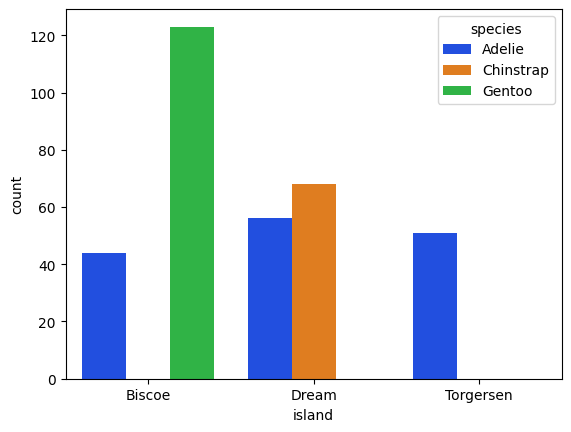

In [30]:
# 结合看多个变量
# 各个岛上都有那些企鹅的种类, 用符合条形图
# 计数图countplot:统计分类变量的数值个数
sns.countplot(cleaned_data, x="island", hue="species")
# x轴是岛屿名称,y轴自动是个数
 

<Axes: xlabel='island', ylabel='count'>

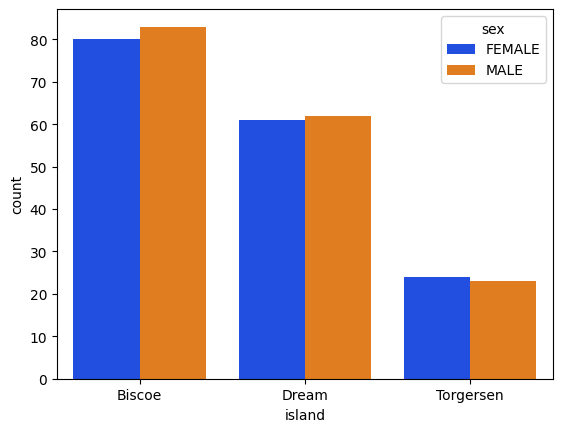

In [24]:
sns.countplot(cleaned_data, x="island", hue="sex")

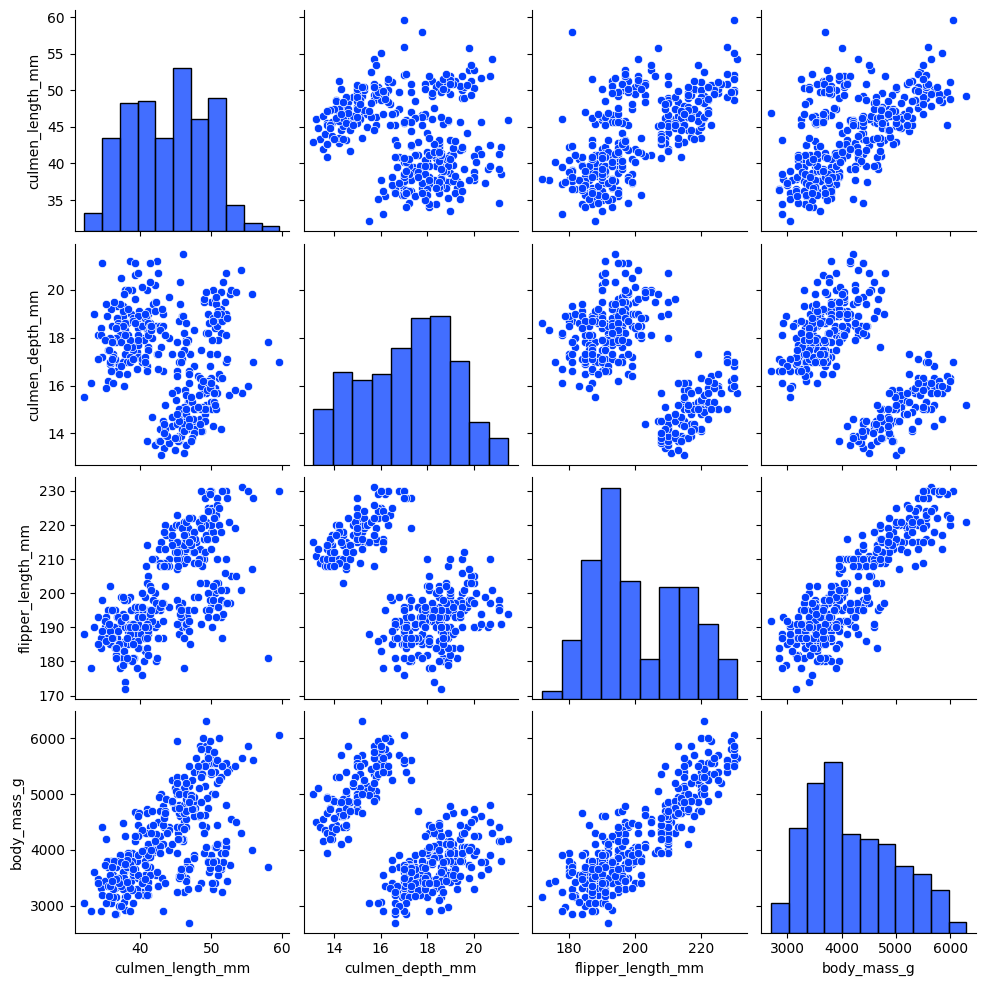

In [25]:
# 分类变量探索完了, 然后探索数值变量
sns.pairplot(cleaned_data)
# pairplot一下展示出柱形图和散点图(展示相关性),密度图
# 发现不符合正态分布, 不同因素累加的结果
# 看看引入species变量的图

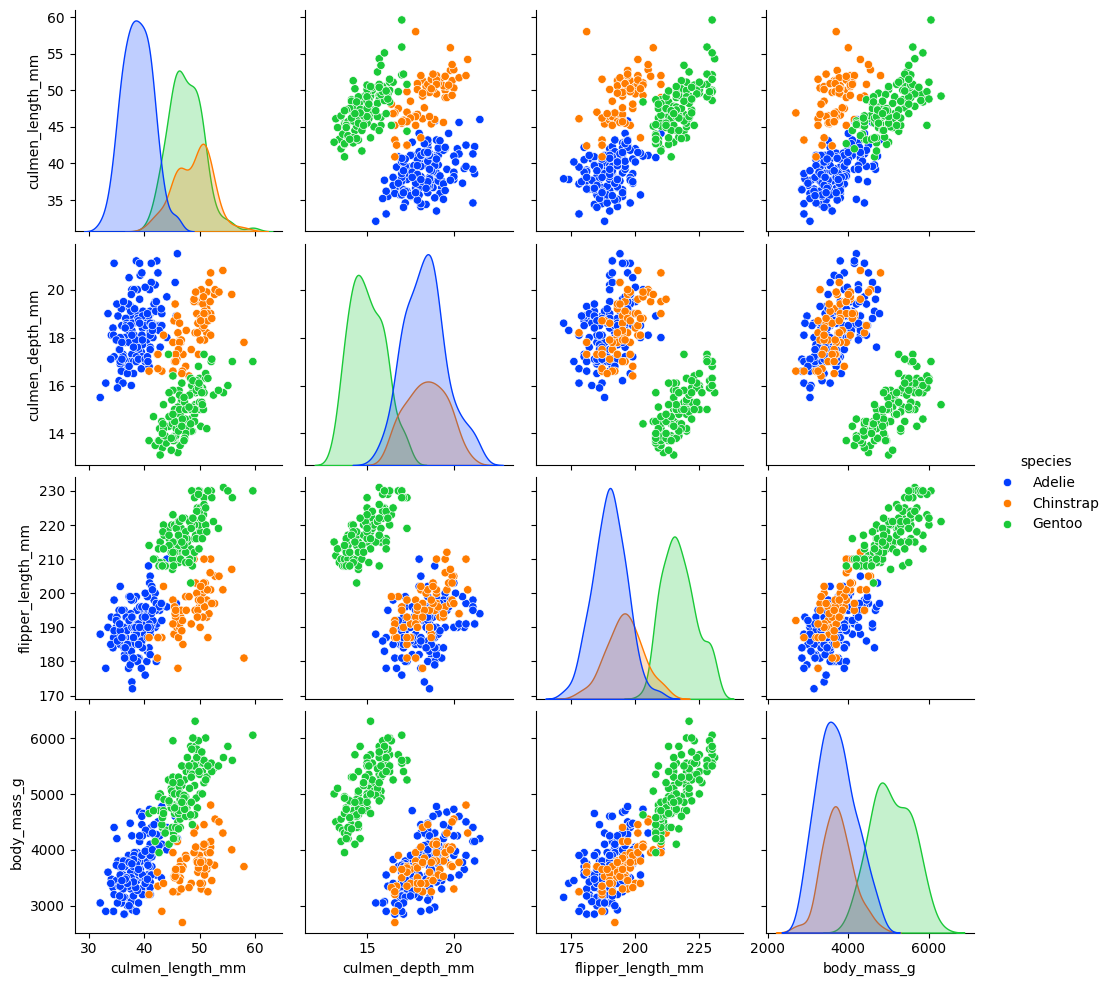

In [31]:
sns.pairplot(cleaned_data, hue="species")

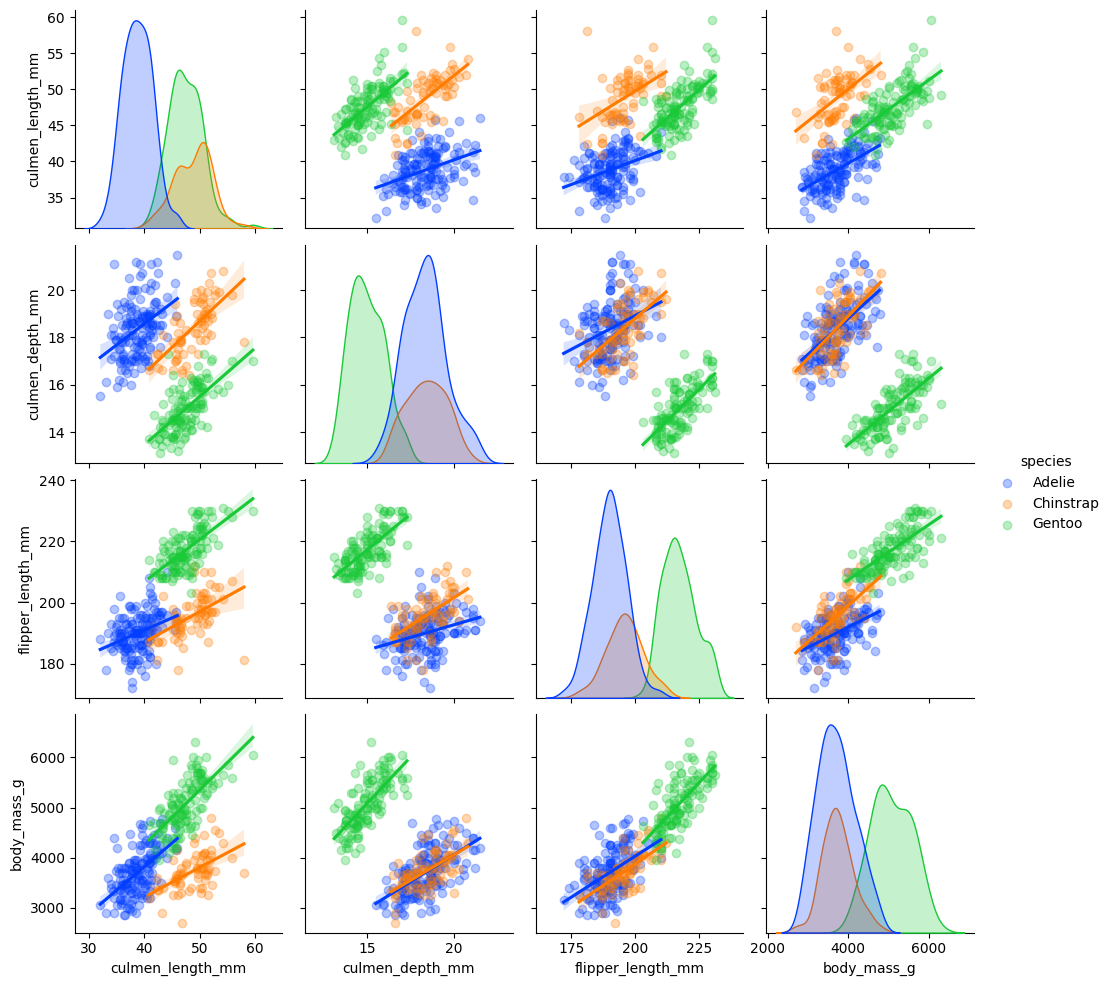

In [36]:
sns.pairplot(cleaned_data, hue='species', kind='reg',plot_kws={'scatter_kws':{'alpha':0.3}})
# 加上kind参数, 值为reg(regression line回归线)
# 颜色混一块了
plt.show()


<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

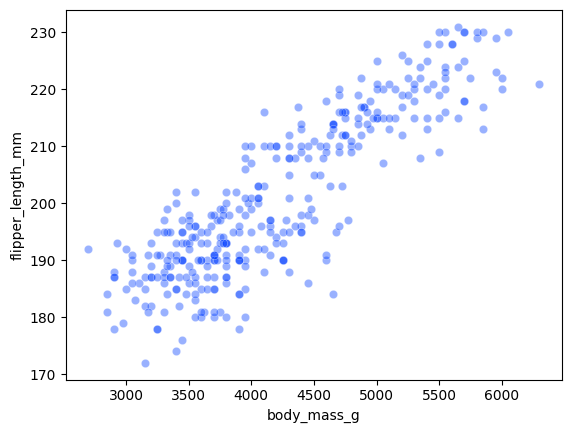

In [28]:
# 普通的散点图中,只需加alpha=0.2参数即可,不要麻烦地用字典
# sns.scatterplot(cleaned_data, x="body_mass_g", y="flipper_length_mm")# 散点图
sns.scatterplot(cleaned_data, x="body_mass_g", y="flipper_length_mm", alpha=0.4)# 加透明的

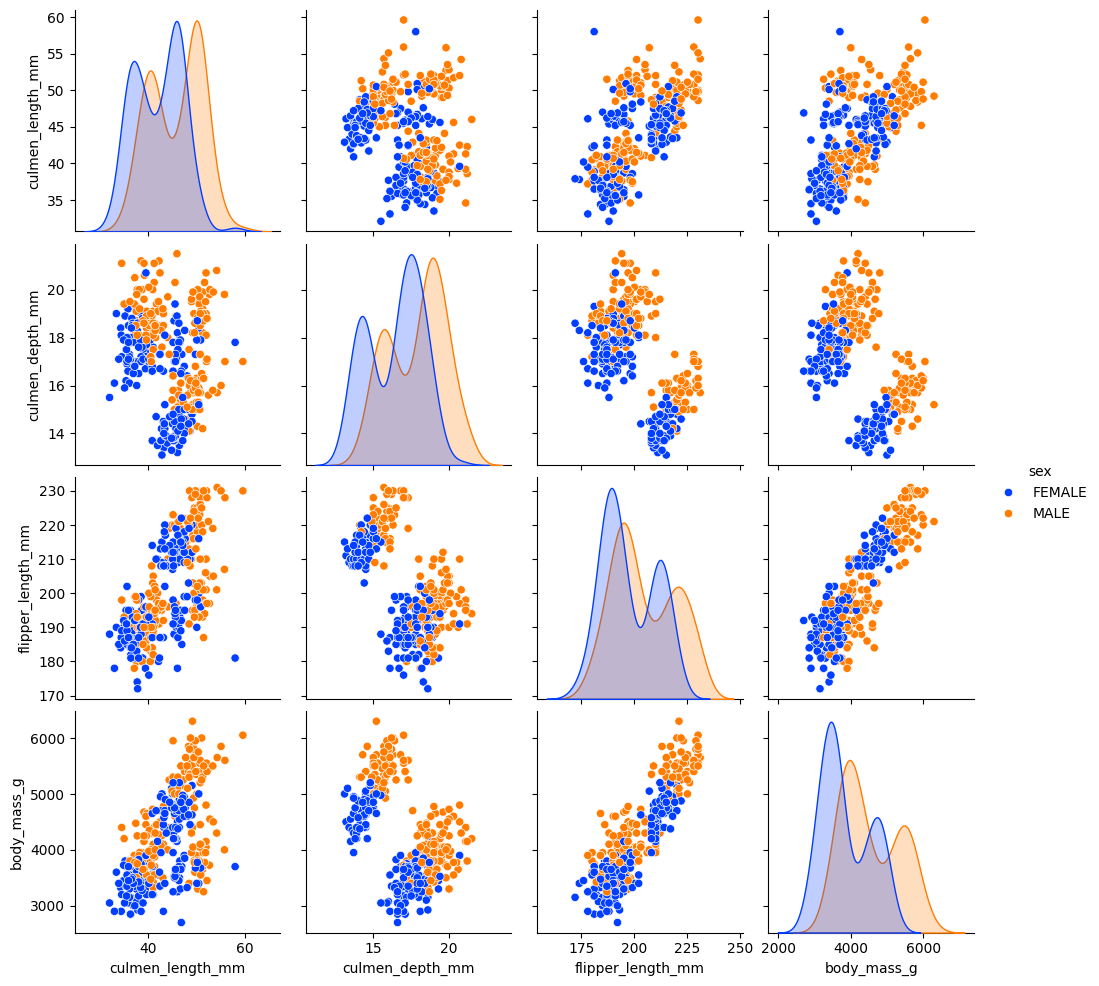

In [29]:
# 在看看性别对数据的影响
sns.pairplot(cleaned_data, hue="sex")
plt.show()